# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether a person will default on their loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 

Dataset: The dataset comes customers default payments in Taiwan. More information about the dataset and columns are found in the link below.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#


You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

#### You will be working in pairs for this assessment; please have ONE notebook and be prepared to explain how you worked in your pair.
1. Clean up your data set so that you can do EDA. This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Create polynomial and/or interaction features. You must also create at least 2 new features that are not interactions or polynomial transformations. For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.
4. Perform some feature selction. This can happen beforehand using F-scores, or you can do it as part of your model building process by looking at the weights of your regularized logistic regression or feature importance of your decision tree.  
5. You must fit each of the three models to your data and tune at least 1 hyperparameter per model. 
6. After identifying the best hyperparameters for each model, fit those models to the test set and identify the best model overall using the evaluation metric of your choice.
7. Present your best model.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data Cleaning

In [2]:
df = pd.read_csv('student_data.csv')

In [3]:
df.shape

(23999, 25)

In [4]:
df['default payment next month'].value_counts()

0    18691
1     5308
Name: default payment next month, dtype: int64

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2873,350000,1,1,2,37,-2,-2,-2,-2,...,466,466,316,316,316,466,466,316,316,0
1,3598,50000,2,2,1,37,2,2,2,0,...,13026,13268,13497,5500,0,580,600,600,600,0
2,27623,50000,2,1,2,23,-1,-1,-1,-1,...,4800,9810,660,2548,2321,4800,9810,660,2980,0
3,6874,20000,1,3,1,56,0,0,0,0,...,13784,13420,13686,1508,1216,1116,0,490,658,0
4,6444,110000,2,2,2,32,0,0,0,0,...,108829,110557,106082,5400,5400,4100,4100,4100,4200,0


### Null Values

First, let's handle null values.

In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There are no null values in this dataset! Great. Next, let's look at what data types we are working with.

In [7]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 25 columns):
ID                            23999 non-null int64
LIMIT_BAL                     23999 non-null int64
SEX                           23999 non-null int64
EDUCATION                     23999 non-null int64
MARRIAGE                      23999 non-null int64
AGE                           23999 non-null int64
PAY_0                         23999 non-null int64
PAY_2                         23999 non-null int64
PAY_3                         23999 non-null int64
PAY_4                         23999 non-null int64
PAY_5                         23999 non-null int64
PAY_6                         23999 non-null int64
BILL_AMT1                     23999 non-null int64
BILL_AMT2                     23999 non-null int64
BILL_AMT3                     23999 non-null int64
BILL_AMT4                     23999 non-null int64
BILL_AMT5                     23999 non-null int64
BILL_AMT6               

### Categorical Features

Looking at our data, we can see that our categorical features are:
* `SEX`
* `EDUCATION`
* `MARRIAGE`
* `PAY_X` with X = 0-6

We also see that the ID column isn't useful to us since we don't need another index, so we'll remove it.

In [8]:
#Dropping ID since we don't need to index them additionally
df.drop(columns = ['ID'],axis=1,inplace=True)

In [9]:
df.shape

(23999, 24)

Let's look at our categorical variables further. First, `SEX`:

In [10]:
#SEX: Gender (1=male, 2=female)
df['SEX'].value_counts()

2    14486
1     9513
Name: SEX, dtype: int64

We now change this variable to have the values that we would expect of a dummy variable.

In [11]:
#Changing these values to be 0 = female, 1 = male
df['SEX']=df['SEX'].apply(lambda x: 0 if x ==2 else x)
df['SEX'].value_counts()

0    14486
1     9513
Name: SEX, dtype: int64

Next, `EDUCATION`.

In [12]:
df['EDUCATION'].describe()

count    23999.000000
mean         1.856786
std          0.791939
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: EDUCATION, dtype: float64

In [13]:
#Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
df['EDUCATION'].value_counts()

2    11188
1     8442
3     3994
5      223
4      100
6       41
0       11
Name: EDUCATION, dtype: int64

Let's change this variable to have a 0 for all unknown values (ex. 4 = others).

In [14]:
#setting 0,4-6 to others
df['EDUCATION']=df['EDUCATION'].apply(lambda x: 0 if x >=4 else x)
df['EDUCATION'].value_counts()

2    11188
1     8442
3     3994
0      375
Name: EDUCATION, dtype: int64

Now we can create dummy variables for these values and label the columns to match the category they represent.

In [15]:
edu_dummies = pd.get_dummies(df['EDUCATION'], drop_first=True)
edu_dummies.describe()

,1,2,3
count,23999.000000,23999.000000,23999.000000
mean,0.351765,0.466186,0.166424
std,0.477531,0.498866,0.372468
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


Next up is `MARRIAGE`

In [16]:
#MARRIAGE: Marital status (1=married, 2=single, 3=others)
df['MARRIAGE'].value_counts()

2    12735
1    10958
3      263
0       43
Name: MARRIAGE, dtype: int64

Like with education, let's change this variable to have a 0 for all unknown values and create dummy variables for the others.

In [17]:
df['MARRIAGE']=df['MARRIAGE'].apply(lambda x: 0 if x ==3 else x)
df['MARRIAGE'].value_counts()

2    12735
1    10958
0      306
Name: MARRIAGE, dtype: int64

In [18]:
marriage_dummies = pd.get_dummies(df['MARRIAGE'], drop_first=True)
marriage_dummies.describe()

,1,2
count,23999.000000,23999.000000
mean,0.456602,0.530647
std,0.498123,0.499070
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


Lastly, we have `PAY_X` columns.

_PAY_X: History of past payment._ <br>
_X values (0 = repayment status in September, 1 = repayment status in August, . . .,6 = repayment status in April)_ <br>
_Repayment Status (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, . . ., 8 = payment delay for eight months, 9 = payment delay for nine months and above)_

Looking at the information for these columns, it seems more complicated than the rest. We'll have to come back to it after some EDA.

### Outliers

Our continuous features are:
* `LIMIT_BAL`
* `AGE`
* `BILL_AMTX`
* `PAY_AMTX` <br>
with X = 1-6

Let's look at these in more detail.

In [19]:
continuous = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for column in continuous:
    print(df[column].describe())
    print('\n')

count      23999.000000
mean      167825.729405
std       129915.115993
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


count    23999.000000
mean        35.523230
std          9.253986
min         21.000000
25%         28.000000
50%         34.000000
75%         42.000000
max         79.000000
Name: AGE, dtype: float64


count     23999.000000
mean      51589.034710
std       74104.132627
min     -165580.000000
25%        3577.500000
50%       22472.000000
75%       67767.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64


count     23999.000000
mean      49521.698112
std       71551.215125
min      -67526.000000
25%        2958.000000
50%       21290.000000
75%       64635.500000
max      983931.000000
Name: BILL_AMT2, dtype: float64


count    2.399900e+04
mean     4.747483e+04
std      7.001082e+04
min     -1.572640e+05
25%      2.718000e+03
50%      2.022300e+04
75

With Outliers:


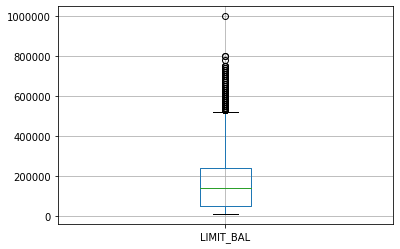

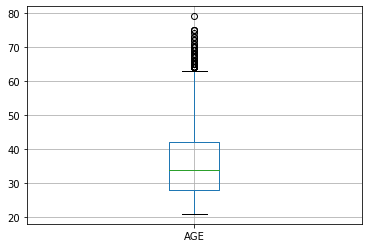

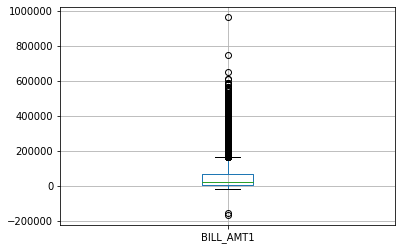

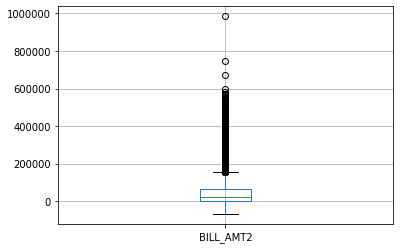

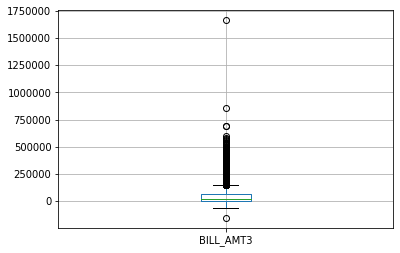

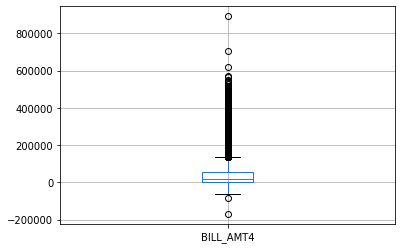

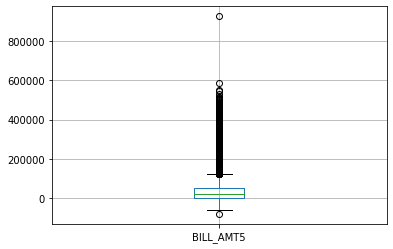

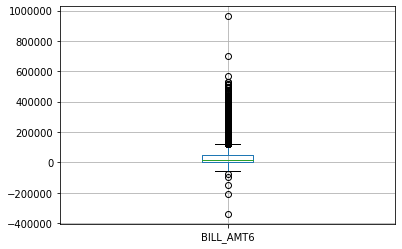

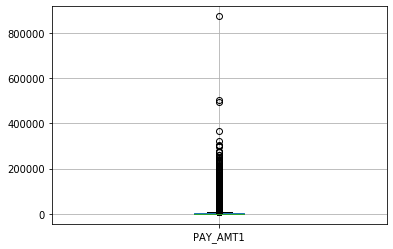

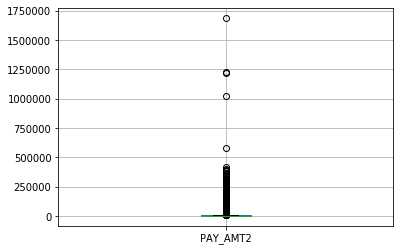

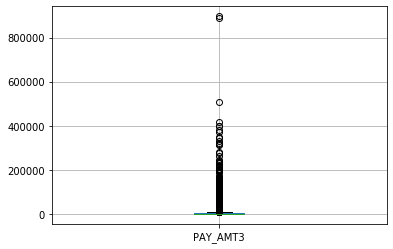

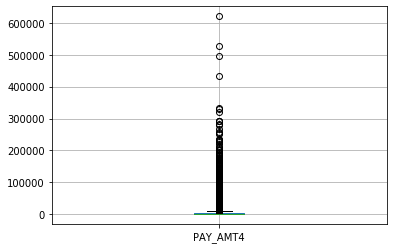

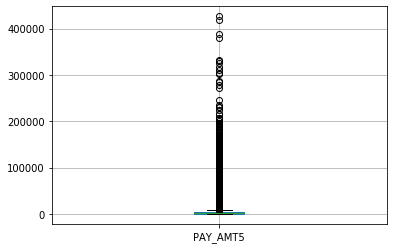

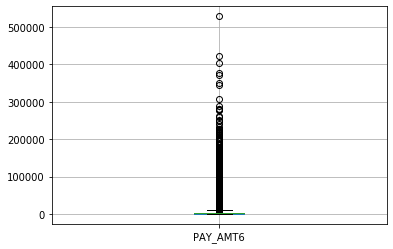

In [20]:
print("With Outliers:")
for column in continuous:
    df.boxplot(column=column)
    plt.show()

We want to leave the `AGE` column alone as we want to include all age groups in our data, and the range of 21-79 seems reasonable. Let's now check how removing the outliers from the other columns would affect our dataset.

In [21]:
def remove_outliers(continous_columns, dataframe):
    """Return a dataframe with any values below the lower fence and above the upper fence removed from given columns in the given dataframe."""
    for column in continous_columns:
        # calculate values for lower fence and upper fence
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR
        # remove rows from dataframe which fall out of this range
        num_removing = dataframe.shape[0]
        new_df = dataframe[dataframe[column] > lower_fence]
        new_df = dataframe[dataframe[column] < upper_fence]
        num_removing -= new_df.shape[0]
        print(f"{num_removing} rows will be removed from {column}.")
    return new_df

In [22]:
continuous.remove('AGE')
remove_outliers(continuous, df)

139 rows will be removed from LIMIT_BAL.
1925 rows will be removed from BILL_AMT1.
1914 rows will be removed from BILL_AMT2.
1973 rows will be removed from BILL_AMT3.
2100 rows will be removed from BILL_AMT4.
2204 rows will be removed from BILL_AMT5.
2172 rows will be removed from BILL_AMT6.
2218 rows will be removed from PAY_AMT1.
2208 rows will be removed from PAY_AMT2.
2081 rows will be removed from PAY_AMT3.
2402 rows will be removed from PAY_AMT4.
2339 rows will be removed from PAY_AMT5.
2371 rows will be removed from PAY_AMT6.


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,350000,1,1,2,37,-2,-2,-2,-2,-2,...,466,466,316,316,316,466,466,316,316,0
1,50000,0,2,1,37,2,2,2,0,0,...,13026,13268,13497,5500,0,580,600,600,600,0
2,50000,0,1,2,23,-1,-1,-1,-1,-1,...,4800,9810,660,2548,2321,4800,9810,660,2980,0
3,20000,1,3,1,56,0,0,0,0,2,...,13784,13420,13686,1508,1216,1116,0,490,658,0
4,110000,0,2,2,32,0,0,0,0,0,...,108829,110557,106082,5400,5400,4100,4100,4100,4200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,230000,0,1,1,35,0,0,-1,-1,-1,...,0,89,2398,78,1897,0,89,2398,671,1
23994,50000,0,1,2,24,0,0,0,-2,-2,...,0,0,0,7522,0,0,0,0,0,1
23995,250000,1,3,1,44,-1,-1,-1,-1,-1,...,43546,38051,576,3924,4482,43676,38166,576,2389,1
23996,50000,1,3,2,26,2,0,0,2,2,...,44891,47654,48721,1800,4000,0,3500,2000,0,1


We can see from this output that removing the outliers from `BILL_AMTX` and `PAY_AMTX` would cause us to lose over 12,000 data points. As such, we'll need a different way to work with these columns. We'll come back to these during our feature engineering phase.

In [23]:
df.shape

(23999, 24)

In [24]:
df = remove_outliers(['LIMIT_BAL'], df)

139 rows will be removed from LIMIT_BAL.


In [25]:
df.shape

(23860, 24)

## 2. EDA

## 3. Feature Engineering

First, we will go back and use the dummy variables we made in our cleaning section to create new categorical columns.

In [26]:
# df = df.drop(['EDUCATION'], axis=1)
# df = pd.concat([df, edu_dummies], axis=1)
# df.rename(columns={1: 'grad_school', 2: 'university', 3: 'highschool'},inplace=True)

In [27]:
# df = df.drop(['MARRIAGE'], axis=1)
# df = pd.concat([df, marriage_dummies], axis=1)
# df.rename(columns={1: 'married', 2: 'single'},inplace=True)

In [28]:
# df.head()

## 4. Feature Selection

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

## 6. Model Evaluation

## 7. Final Model